## Bernstein Vazirani Algoritması

Bernstein-Vazirani algoritması, kuantum bilgisayarlarının klasik bilgisayarlardan daha hızlı çözebileceği bir probleme odaklanan bir kuantum algoritmasıdır. Bu algoritma, bir sihirli sayıyı (gizli sayıyı) bulmayı hedefler.

Klasik bilgisayarlarda, bir sihirli sayıyı bulmak için genellikle "sihirbazlık numarası" denilen bir tahmin ile başlarız ve ardından bu sayının ne olduğunu bulmak için sorgular yaparız. Bir sayının belirli bir özelliğe sahip olup olmadığını bulmak için birçok sorgu yapmamız gerekebilir.

Bernstein-Vazirani algoritması ise bu süreci kuantum bilgisayarlarında daha verimli bir şekilde gerçekleştirir. Bu algoritma, klasik bir işlemde yapılan sorgu sayısını tek bir sorguyla azaltabilir.

Algoritma, bir sihirli sayının klasik bitler (0 ve 1'ler) olarak temsil edildiği bir gizli fonksiyonu bulmaya odaklanır. Bu gizli fonksiyon, bir sihirli sayıyı alır ve bu sayının belirli bir özelliğini verir. Algoritma, bu gizli fonksiyonun sonucundan yararlanarak sihirli sayıyı bulmayı amaçlar.

Bernstein-Vazirani algoritması, klasik bir işlemde sihirli sayıyı bulmak için yapılacak sorgu sayısını büyük ölçüde azaltarak, kuantum bilgisayarlarının bazı belirli problemleri daha hızlı çözebilme yeteneğini gösterir. Bu algoritma, özellikle kuantum paralelizmi ve kuantum süperpozisyonu gibi özellikler sayesinde avantaj sağlar.

In [3]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [4]:
Number = '10101010100'

In [5]:
circuit = QuantumCircuit(len(Number)+1,len(Number))

In [6]:
circuit.h(range(len(Number)))
circuit.x(len(Number))
circuit.h(len(Number))

circuit.barrier()

for index, one in enumerate(reversed(Number)):
    print(f"index{index} is {one}")
    if one == "1":
        circuit.cx(index,len(Number))

circuit.barrier()

circuit.h(range(len(Number)))

circuit.barrier()

circuit.measure(range(len(Number)),range(len(Number)))

index0 is 0
index1 is 0
index2 is 1
index3 is 0
index4 is 1
index5 is 0
index6 is 1
index7 is 0
index8 is 1
index9 is 0
index10 is 1


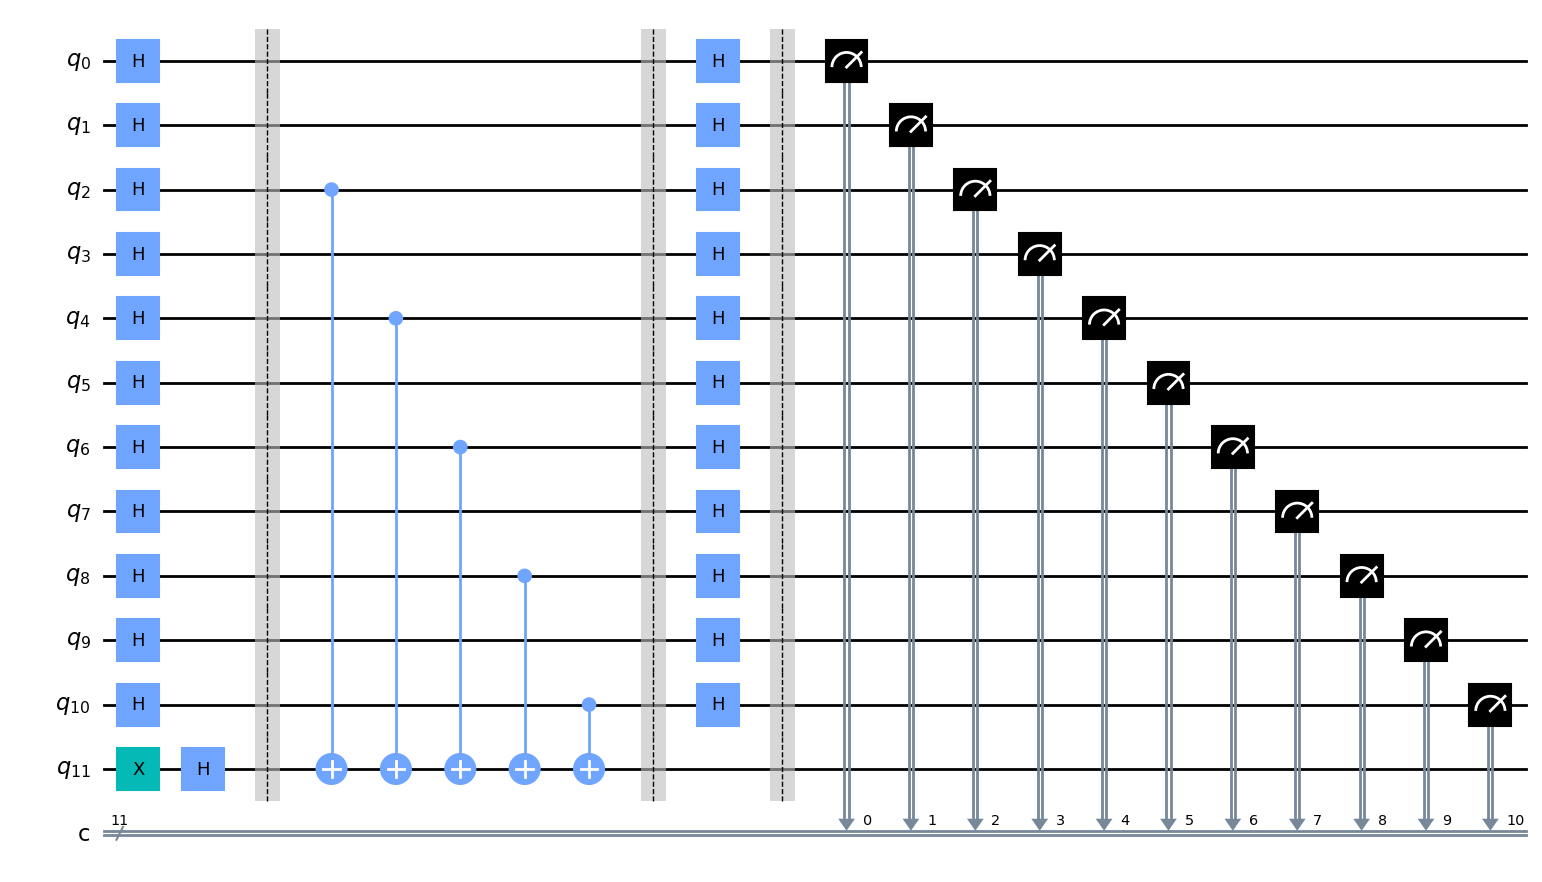

In [7]:
circuit.draw(output='mpl')

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'10101010100': 1}


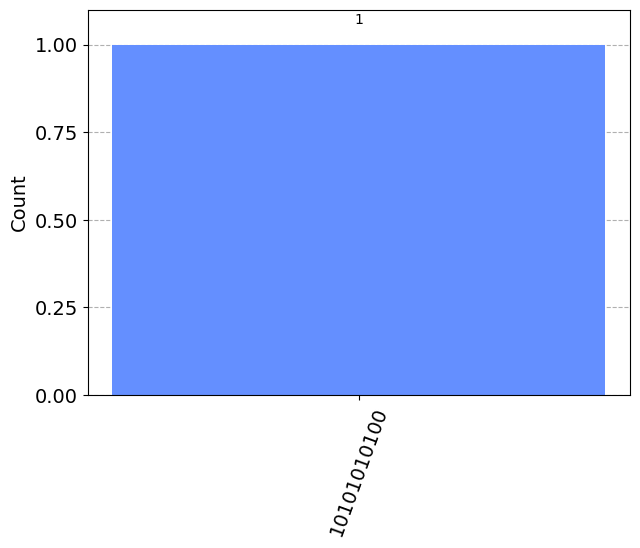

In [9]:
plot_histogram([counts])